In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
root_folder = "gdrive/MyDrive/emotion_recognition/"
data_path = root_folder + "data_init/"
data_seg_path = root_folder + "data_init_segments/"
res_folder = root_folder + 'experiments/'
audio_features_folder = res_folder + "audio_features/"

In [ ]:
df_file = pd.read_csv(res_folder+'init.csv', ).reset_index(drop=True)


df_file['emotion_merged'] = df_file['emotion']
df_file.loc[df_file['emotion_merged'] == 'pleasant_surprise', 'emotion_merged'] = 'happy'
df_file.loc[df_file['emotion_merged'] == 'disgust', 'emotion_merged'] = 'angry'
df_file['label'] = df_file['emotion_merged'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy'] else 'conflict')
df_file['path'] = data_path + df_file['folder_name'] + '/' + "rs_16_" + df_file['audio_file_name']
df_file['folder'] = df_file.path.str.split('/').str[4]

df_file = df_file.drop(columns=['Unnamed: 0', 'emotion'])


In [ ]:
def change_lang(lang, langid_lang):
  if lang == 's':
    if langid_lang == 'ru':
      return 'r'
    return 'u'
  return lang


df_seg = pd.read_csv(data_seg_path+'seg_info.csv').drop([48]).reset_index(drop=True)
df_seg['emotion_merged'] = df_seg['emotion']
df_seg.loc[df_seg['emotion_merged'] == 'pleasant_surprise', 'emotion_merged'] = 'happy'
df_seg.loc[df_seg['emotion_merged'] == 'disgust', 'emotion_merged'] = 'angry'
df_seg['label'] = df_seg['emotion_merged'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy'] else 'conflict')
df_seg['context_label'] = df_seg['emotion_context'].apply(lambda x: 'no-conflict' if x in ['neutral', 'happy', 'pleasant_surprise'] else 'conflict')

df_seg['language'] = df_seg.apply(lambda row: change_lang(row['language'], row['langid_language']),
                                  axis=1)
df_seg['path'] = df_seg['folder_name'] + df_seg['res_file_name']

df_seg = df_seg.drop(columns=['Unnamed: 0', 'folder_name', 'file_name',
                              'info', 'emotion', 'langid_language'])

In [ ]:
def merge_labels(df_meta, df_features, drop_index=False, merge_on="path"):
  return df_features.reset_index(drop=drop_index) \
                    .rename(columns={"file":"path"}) \
                    .merge(df_meta[[merge_on, 'label']], on=merge_on, how='inner', suffixes=('_1', '_2'))

In [ ]:
df_file_smile_func_compare = pd.read_csv(audio_features_folder+'file_smile_func_compare.csv')
df_seg_smile_func_compare = pd.read_csv(audio_features_folder+'seg_smile_func_compare.csv')
df_file_smile_lld_compare = pd.read_csv(audio_features_folder+'file_smile_lld_compare.csv')
df_seg_smile_lld_compare = pd.read_csv(audio_features_folder+'seg_smile_lld_compare.csv')

In [ ]:
df_file_smile_func_compare = merge_labels(df_file, df_file_smile_func_compare, drop_index=True)
df_seg_smile_func_compare = merge_labels(df_seg, df_seg_smile_func_compare, drop_index=True)

In [ ]:
df_file_smile_func_compare

,path,start,end,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
0,gdrive/MyDrive/emotion_recognition/data_init/s...,0 days,0 days 00:00:17.872500,1.283552,0.033708,0.325281,0.109207,0.240537,0.415219,0.131329,...,0.476856,2.521514,2.514038,19.978773,0.528980,102.360435,70.812470,111.667080,61.986046,conflict
1,gdrive/MyDrive/emotion_recognition/data_init/n...,0 days,0 days 00:01:14.988750,2.679650,0.330530,0.890001,0.137043,0.293697,0.512394,0.156655,...,0.545300,2.753846,2.752458,20.000000,0.529538,111.446790,62.913900,106.788300,66.268560,no-conflict
2,gdrive/MyDrive/emotion_recognition/data_init/n...,0 days,0 days 00:00:44.886750,2.250638,0.770141,0.350591,0.242055,0.454419,0.776935,0.212363,...,0.606413,2.899858,2.897305,19.999956,0.524339,116.139700,66.812965,124.034860,68.594140,no-conflict
3,gdrive/MyDrive/emotion_recognition/data_init/n...,0 days,0 days 00:00:22.242750,2.240661,0.371673,0.095625,0.271305,0.462891,0.767043,0.191586,...,0.531447,2.454527,2.455941,-19.999998,0.567238,103.402940,56.456055,105.922386,56.812750,no-conflict
4,gdrive/MyDrive/emotion_recognition/data_init/s...,0 days,0 days 00:00:39.272375,1.046224,0.581633,0.141837,0.072590,0.136479,0.234329,0.063889,...,0.583490,3.390380,3.389391,20.000000,0.599296,131.749950,70.381040,133.181060,79.889340,conflict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,gdrive/MyDrive/emotion_recognition/data_init/a...,0 days,0 days 00:00:51.994750,2.361897,0.859592,0.886364,0.085579,0.323866,0.927151,0.238288,...,0.569292,3.145426,3.144486,20.000000,0.499182,118.308750,69.943700,124.515274,73.712290,conflict
86,gdrive/MyDrive/emotion_recognition/data_init/n...,0 days,0 days 00:00:23.817250,1.798610,0.171862,0.325611,0.106640,0.308796,0.659860,0.202156,...,0.469820,2.784069,2.786001,-19.999992,0.677538,118.010580,65.573000,119.231995,67.080510,no-conflict
87,gdrive/MyDrive/emotion_recognition/data_init/a...,0 days,0 days 00:01:01.842375,2.345291,0.462846,0.509147,0.191895,0.403249,0.720307,0.211355,...,0.549852,3.185617,3.181717,19.999657,0.661543,134.025200,71.061806,122.316630,64.499620,conflict
88,gdrive/MyDrive/emotion_recognition/data_init/n...,0 days,0 days 00:01:46.621125,2.904612,0.649836,0.968747,0.143228,0.333124,0.596066,0.189896,...,0.649722,2.537594,2.536940,20.000000,0.586916,109.925540,59.953148,108.964130,61.822678,no-conflict


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df_file_smile_func_compare.drop(columns=['start', 'end', 'path', 'label']),
#                                                     df_file_smile_func_compare['label'], test_size=0.33, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

clf = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=100).fit(
          df_file_smile_func_compare.drop(columns=['start', 'end', 'path', 'label']),
          df_file_smile_func_compare['label'])

selector = SelectFromModel(clf, prefit=True)
selected_features = selector.get_support()

selected_feature_names = df_file_smile_func_compare.drop(columns=['start', 'end', 'path', 'label']).columns[selected_features]

print(selected_feature_names.values)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

['audspecRasta_lengthL1norm_sma_kurtosis'
 'audspecRasta_lengthL1norm_sma_maxSegLen'
 'audspecRasta_lengthL1norm_sma_de_kurtosis'
 'audSpec_Rfilt_sma[0]_kurtosis' 'audSpec_Rfilt_sma[1]_kurtosis'
 'audSpec_Rfilt_sma[2]_kurtosis' 'audSpec_Rfilt_sma[3]_kurtosis'
 'audSpec_Rfilt_sma[4]_kurtosis' 'audSpec_Rfilt_sma[5]_range'
 'audSpec_Rfilt_sma[5]_kurtosis' 'audSpec_Rfilt_sma[6]_kurtosis'
 'audSpec_Rfilt_sma[7]_kurtosis' 'audSpec_Rfilt_sma[8]_range'
 'audSpec_Rfilt_sma[9]_range' 'audSpec_Rfilt_sma[9]_kurtosis'
 'audSpec_Rfilt_sma[10]_kurtosis' 'audSpec_Rfilt_sma[10]_maxSegLen'
 'audSpec_Rfilt_sma[11]_kurtosis' 'audSpec_Rfilt_sma[12]_kurtosis'
 'audSpec_Rfilt_sma[13]_kurtosis' 'audSpec_Rfilt_sma[14]_range'
 'audSpec_Rfilt_sma[14]_kurtosis' 'audSpec_Rfilt_sma[16]_kurtosis'
 'audSpec_Rfilt_sma[16]_maxSegLen' 'audSpec_Rfilt_sma[18]_range'
 'audSpec_Rfilt_sma[18]_kurtosis' 'audSpec_Rfilt_sma[20]_kurtosis'
 'audSpec_Rfilt_sma[21]_kurtosis' 'audSpec_Rfilt_sma[22]_kurtosis'
 'audSpec_Rfilt_sma[23]_

In [ ]:
 selected_feature_names


Index(['audspecRasta_lengthL1norm_sma_kurtosis',
       'audspecRasta_lengthL1norm_sma_maxSegLen',
       'audspecRasta_lengthL1norm_sma_de_kurtosis',
       'audSpec_Rfilt_sma[0]_kurtosis', 'audSpec_Rfilt_sma[1]_kurtosis',
       'audSpec_Rfilt_sma[2]_kurtosis', 'audSpec_Rfilt_sma[3]_kurtosis',
       'audSpec_Rfilt_sma[4]_kurtosis', 'audSpec_Rfilt_sma[5]_range',
       'audSpec_Rfilt_sma[5]_kurtosis',
       ...
       'mfcc_sma_de[12]_meanFallingSlope',
       'mfcc_sma_de[12]_stddevFallingSlope', 'mfcc_sma_de[13]_peakMeanRel',
       'mfcc_sma_de[13]_meanRisingSlope', 'mfcc_sma_de[13]_stddevRisingSlope',
       'mfcc_sma_de[13]_meanFallingSlope',
       'mfcc_sma_de[13]_stddevFallingSlope', 'mfcc_sma_de[14]_peakMeanRel',
       'mfcc_sma_de[14]_meanRisingSlope', 'mfcc_sma_de[14]_stddevRisingSlope'],
      dtype='object', length=643)

In [1]:
# !pip install wandb

In [ ]:
import wandb
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt

def evaluate(y_true, y_pred, run, display_cm=True, display_cr=True):
    # print(f"f1-score: {round(f1_score(y_true, y_pred, average='binary'),2)}, accuracy: {round(accuracy_score(y_true, y_pred),2)}")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    if display_cm:
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot()
      plt.show()

    if display_cr:
      cr = classification_report(y_true, y_pred)
      print(cr)

    if run:
      wandb.sklearn.plot_confusion_matrix(y_true, y_pred)

      cr = classification_report(y_true, y_pred, output_dict=True)
      run.log({"accuracy" : cr['accuracy'],
              "no_conflict_precision" : cr['no-conflict']['precision'],
              "no_conflict_recall" : cr['no-conflict']['recall'],
              "no_conflict_f1-score" : cr['no-conflict']['f1-score'],
              "conflict_precision" : cr['conflict']['precision'],
              "conflict_recall" : cr['conflict']['recall'],
              "conflict_f1-score" : cr['conflict']['f1-score']})

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time


def cross_validation_n_fold(clf, values, true_labels, wandb_config=None, cv=5):
  run = None
  if wandb_config:
    timestr = time.strftime("%m%d-%H%M")
    run = wandb.init(project="emotion_recognition",
              name=f"e_{timestr}_audio_eval",
              config=wandb_config)

  # score = cross_val_score(clf, values, true_labels, cv=5)

  pred = cross_val_predict(clf, values, true_labels, cv=5)

  evaluate(true_labels, pred, run)

  if wandb_config:
    wandb.finish()
  # print(score)
  # print(confusion_matrix(true_labels, pred))
  # print(classification_report(true_labels, pred))

In [ ]:
def fold_i_of_k(meta_df, seg_features, i, k):
    n = len(meta_df)

    return meta_df[n*(i-1)//k:n*i//k]


def manual_k_fold(clf, df_seg, df_seg_features, name='pred_compare_func', wandb_config=None, cv=5):
  run=None
  if wandb_config:
    timestr = time.strftime("%m%d-%H%M")
    run = wandb.init(project="emotion_recognition",
              name=f"e_{timestr}_audio_eval",
              config=wandb_config)

  for i in range(1, cv+1):
    fold_i_of_k(df_file, df_seg, i, cv)
    k_fold = df_seg[df_seg['conversation_folder_name'].isin(fold_i_of_k(df_file, df_seg, i, cv).folder_name)]
    features_test = df_seg_features[df_seg_features['path'].isin(k_fold.path)].copy()
    features_train = df_seg_features[~df_seg_features['path'].isin(k_fold.path)].copy()

    clf.fit(features_train.drop(columns=['path', 'label']),
                  features_train['label'])
    try:
      pred = clf.predict(features_test.drop(columns=['path', 'label']))
    except:
      display(features_test)

    df_seg.loc[k_fold.index, name] = pred
  print(df_seg[name].value_counts())
  df_res = df_seg[['conversation_folder_name', 'context_label', 'label', name]] \
            .groupby(['conversation_folder_name', 'context_label'])[name] \
            .apply(lambda x: 'conflict' if 'conflict' in list(x.values) else 'no-conflict').reset_index()

  evaluate(df_res['context_label'], df_res[name], run=run)


  if wandb_config:
    run.finish()

[[33 11]
 [10 36]]


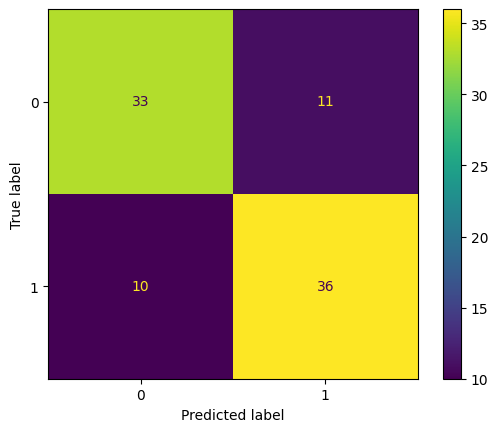

              precision    recall  f1-score   support

    conflict       0.77      0.75      0.76        44
 no-conflict       0.77      0.78      0.77        46

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



In [ ]:
# wandb_config['model_name'] = "LR"
# wandb_config['feature_level'] = "func"
# wandb_config['data'] = "init_full_1h"
# wandb_config['split'] = "no"


clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=0),
)

cross_validation_n_fold(clf, df_file_smile_func_compare[selected_feature_names],
               df_file_smile_func_compare['label'], None)

In [ ]:
len(selected_feature_names)


643

In [ ]:
print(selected_feature_names.values)

['audspecRasta_lengthL1norm_sma_kurtosis'
 'audspecRasta_lengthL1norm_sma_maxSegLen'
 'audspecRasta_lengthL1norm_sma_de_kurtosis'
 'audSpec_Rfilt_sma[0]_kurtosis' 'audSpec_Rfilt_sma[1]_kurtosis'
 'audSpec_Rfilt_sma[2]_kurtosis' 'audSpec_Rfilt_sma[3]_kurtosis'
 'audSpec_Rfilt_sma[4]_kurtosis' 'audSpec_Rfilt_sma[5]_range'
 'audSpec_Rfilt_sma[5]_kurtosis' 'audSpec_Rfilt_sma[6]_kurtosis'
 'audSpec_Rfilt_sma[7]_kurtosis' 'audSpec_Rfilt_sma[8]_range'
 'audSpec_Rfilt_sma[9]_range' 'audSpec_Rfilt_sma[9]_kurtosis'
 'audSpec_Rfilt_sma[10]_kurtosis' 'audSpec_Rfilt_sma[10]_maxSegLen'
 'audSpec_Rfilt_sma[11]_kurtosis' 'audSpec_Rfilt_sma[12]_kurtosis'
 'audSpec_Rfilt_sma[13]_kurtosis' 'audSpec_Rfilt_sma[14]_range'
 'audSpec_Rfilt_sma[14]_kurtosis' 'audSpec_Rfilt_sma[16]_kurtosis'
 'audSpec_Rfilt_sma[16]_maxSegLen' 'audSpec_Rfilt_sma[18]_range'
 'audSpec_Rfilt_sma[18]_kurtosis' 'audSpec_Rfilt_sma[20]_kurtosis'
 'audSpec_Rfilt_sma[21]_kurtosis' 'audSpec_Rfilt_sma[22]_kurtosis'
 'audSpec_Rfilt_sma[23]_